In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Introduction
**Research Question**

We want to use the data to answer the question: How does race data granularity indicate the selectivity of institutions?

**Hypothesis**

In regression models to predict the selectivity of colleges (selective, more-selective, non-selective), granular race data better predicts selectivity. We will measure this by reporting the statistical significance of the relevant models, and interpret it relative to the types of race group inputs; we will check whether these results hold for different groupings of inputs: no race, poc lumpings, and poc granular.

**Motivation**

This research area is an important one to study due to its weight in determining people’s futures, its recent scrutiny with the college admission scandals in 2019, the Supreme Court’s ban on Affirmative Action in 2023, and its overall impact on societal equity and opportunity. According to data from 2021, 62% of high school graduates go on to pursue post-secondary education, and 74.9% of all college students attend 4-year institutions; that is approximately 14 million students enrolled in 4-year institutions across the US (Hanson). This highlights the immense influence that admission practices at 4-year universities exert on a large portion of the population. Given the recent controversies and legal developments surrounding admissions processes, coupled with the substantial number of individuals affected, a thorough examination of algorithms in this context is vital for ensuring fairness, justice, and equal access to educational opportunities for all prospective students. This relates to algorithmic fairness as it's aimed to understand potential biases in admission decisions and preventing future algorithms/or decision-making structures from making this.

**Related Work**

In our literature review for the project we first encountered a paper titled "Analysis of AI Models for Student Admissions: A case study" which investigated the use of AI models to predict admissions decisions at a large urban reseach university. The paper was very pertinent to our project as it examined the exact issue that our group is aiming to shed light on and revealed certain biases such as legacy admissions, which institutions have ignored. The project also showed that since the shift to not requiring standardized test scores begnining in 2020, schools have less data to work with and overweighting features that can lead to biases. Specifically, “many students who would not be admitted under test-required policies would be admitted under-test optional policies” (Van Busum, 19). While we didn't choose to look into bias regarding test scores, this study set a precedent for us to look into bias for all sensitive features regarding college admissions. The next paper we looked into was the paper titled "Diversifying Society's Leaders? The Determinants and Causal Effects of Admission to Highly Selective Private Colleges" which evaluates the perpetuation of privilege through admission processes of top-tier colleges. The key insight we took from this paper was that top-tier colleges, typically private and selective, have a bias towards high-income students, a population that consists of legacy status, similar extracurriculars, and high athletic involvement. Furthermore, this insight showed that there is bias among the different selectivity levels of colleges which was a key finding for our project. Lastly, we looked at the paper titled "The disparate impact of college admission policies on Asisn American Applicants" which analysed the gap in university admission between Asiam American and white students with similar test scores. The main insight we took from this paper was that taking out biases like legacy, overall Asian American appliacants were admitted at lower rates than white applicants with identical test scores, the largest gap being for South Asian students specifically. We used this insight as a precedent for potential racial bias in college admissions, which again was a key motivator for the current iteration of our project.


# Datasheet
**(i)** The dataset contained the folowing attributes (columns)  and observations (rows)

* `unitid` : unique integer if for each college
* `year` : integer representing the year of the particular obersavation
* `fips_ipeds` : word representing the state (United of States of America) of the observation
* `inst_name` : word representing institution name
* `slevel` : word representing the level of the institution (4-year or 2-year)
* `fourcat`: category of the school: public selective, private selective,  private non-selective, public non-selective
* `public`, `private` : one-hot encoding for whether a college is private or not
* `forprofit` : one-hot encoding for non-profit colleges
* `selective`, `non-selective`, `more-selective` : one-hot encoding for selectivity level of college
* `total_enrollment` : number representing total enrollment count of the observation
* `col_white`, `col_black`, `col_hispa`, `col_asian`, `col_amind`, `col_pacis`, `col_twora`: percentages of particular demographics in a particular college
* `mkt_white`, `mkt_black`, `mkt_hispa`, `mkt_asian`, `mkt_amind`, `mkt_pacis`, `mkt_twora`: percentages of particular demographics in a particular college market



**(ii)** The dataset was created by researchers at Urban Data Catalog to analyze racial and ethnic representaiton in postsecondary education, specifically whether different racial and ethnic groups have equal access to higher education (Monarrez, T. and Washington, K. 2020).

**(iii)** The dataset was funded by the Urban Institute and **(iv)** was potentially influenced by data being unavailable for certain colleges, leading to more data in certain selectivity categories than others. **(v)** Information on preprocessing of the dataset was not given, and the data was sourced from the Integrated Postsecondary Education Data System and US Census American Community Survey. **(vi)** The researchers who first used and published the dataset primarily utilized it analze racial and ethnic representation in higher education. **(vii)** Link to raw dataset: https://datacatalog.urban.org/dataset/racial-and-ethnic-representativeness-us-postsecondary-education-institutions


# Cleaned Data Imports

In [3]:
from google.colab import drive

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/INFO 4390 Project/'
df = pd.read_csv(folder_path + 'filtered_data.csv')

Mounted at /content/drive


In [4]:
df.head()

,col_white,col_black,col_hispa,col_asian,col_amind,col_pacis,col_twora,dif_white,dif_black,dif_hispa,...,col_poc,new_england,mid_east,south_east,great_lakes,south_west,rocky_mountains,plains,far_west,selectivity
0,2.762706,95.370244,0.577441,0.186055,0.157606,0.099440,0.846508,-59.900314,68.393853,-5.453678,...,97.237294,0,0,1,0,0,0,0,0,selective
1,1.355407,96.806491,0.907462,0.167595,0.081772,0.054439,0.626834,-54.552670,58.535882,-3.203888,...,98.644593,0,0,1,0,0,0,0,0,selective
2,81.560872,12.450587,1.812751,0.762370,2.028190,0.065753,1.319478,15.562983,-14.094827,-3.879124,...,18.439128,0,0,1,0,0,0,0,0,non_selective
3,86.449566,7.204630,2.962130,2.238553,0.665542,0.011306,0.468272,25.724310,-24.169229,-1.976219,...,13.550434,0,0,1,0,0,0,0,0,more_selective
4,87.406235,7.883860,2.214625,1.847222,0.648058,0.000000,0.000000,25.340940,-24.407380,-1.166189,...,12.593765,0,0,1,0,0,0,0,0,more_selective


In [5]:
df[['col_white', 'col_black', 'col_hispa', 'col_asian', 'col_amind', 'col_pacis', 'col_twora', 'col_poc', 'new_england', 'mid_east', 'south_east', 'great_lakes', 'south_west', 'rocky_mountains', 'plains', 'far_west', 'public', 'selectivity']]

,col_white,col_black,col_hispa,col_asian,col_amind,col_pacis,col_twora,col_poc,new_england,mid_east,south_east,great_lakes,south_west,rocky_mountains,plains,far_west,public,selectivity
0,2.762706,95.370244,0.577441,0.186055,0.157606,0.099440,0.846508,97.237294,0,0,1,0,0,0,0,0,1.0,selective
1,1.355407,96.806491,0.907462,0.167595,0.081772,0.054439,0.626834,98.644593,0,0,1,0,0,0,0,0,1.0,selective
2,81.560872,12.450587,1.812751,0.762370,2.028190,0.065753,1.319478,18.439128,0,0,1,0,0,0,0,0,1.0,non_selective
3,86.449566,7.204630,2.962130,2.238553,0.665542,0.011306,0.468272,13.550434,0,0,1,0,0,0,0,0,1.0,more_selective
4,87.406235,7.883860,2.214625,1.847222,0.648058,0.000000,0.000000,12.593765,0,0,1,0,0,0,0,0,1.0,more_selective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,91.003790,1.327253,2.156830,3.286284,0.378542,0.105612,1.741688,8.996210,0,0,0,1,0,0,0,0,1.0,selective
1592,89.586359,1.793087,2.130822,1.235030,2.452742,0.100435,2.701525,10.413641,0,0,0,1,0,0,0,0,1.0,selective
1593,85.904589,4.653813,4.547350,1.656402,0.214200,0.057667,2.965980,14.095411,0,0,0,1,0,0,0,0,1.0,selective
1594,92.214243,1.859869,2.320141,1.794738,0.546329,0.030353,1.234327,7.785757,0,0,0,1,0,0,0,0,0.0,selective


# Summarize the data

## Data Explanation

In our cleaned dataset we have 1596 rows with 18 columns. Each row represents a college. Recall that these columns are averaged over the 9 years present in the datatset, from 2009 to 2017, and the percentages are skewed up to sum up to 100%.

**Summary of the features in our dataset:**

* `new_england` = a binary variable that is 1 if the college is located in the New England region (Connecticut, Massachusetts, Rhode Island, Maine, New Hampshire, and Vermont).

* `mid_east` = a binary variable that is 1 if the college is located in the Mid East region (New York, New Jersey, Pennsylvania, Maryland, Delaware, District of Columbia)

* `south_east` = a binary variable that is 1 if the college is located in the South East region (Florida, South Carolina, North Carolina, Georgia, Tennessee, West Virginia, Virginia, Alabama, Arkansas, Mississippi, Kentucky, Louisianna)

* `great_lakes` = a binary variable that is 1 if the college is located in the Great Lakes region (Ohio, Michigan, Wisconsin, Indiana, Illinois).

* `south_west` = a binary variable that is 1 if the college is located in the South West region (Texas, Arizona, New Mexico, Oklahoma).

* `rocky_mountains` = a binary variable that is 1 if the college is located in the Rocky Mountains region (Colorado, Utah, Idaho, Wyoming, Montana). Note that there is no college from Wyoming in the cleaned dataset.

* `plains` = a binary variable that is 1 if the college is located in the Plains region (Iowa, Missouri, Kansas, Nebraska, South Dakota, North Dakota, Minnesota).

* `far_west` = a binary variable that is 1 if the college is located in the Far West region (Alaska, Hawaii, California, Oregon, Washington, Nevada).

* `public` = a binary variable that indicates 1 if the college is public

* `private` = a binary variable that indicates 1 if the college is public. A college is either pubic or private, never both or neither.

* `selectivity` = our classes/outcome variable that indicates how selective a college is. A college is either `selective`, `more_selective`, or `non_selective`.

* `col_white` = college percent white

* `mkt_white` = market percent white defined geographically according to institutions’ level, degree of selectivity, and urbanicity

* `dif_white` = college representation of White Population with respect to the market representation (`col_white` - `mkw_white`)

... same for the rest of the race groups. `amind` = American Indian, `pacis` = Pacific Islander, `twora` = 2 or more races.

* `col_poc` = the percentage of Persons of Color on the college. It is the sum of `col_black`, `col_hispa`, `col_asian`, `col_amind`, `col_pacis`, and `col_twora`


**Sensitive Features and Target Variables**

Our sensitive variables of interst are the percentages of different racial groups at each college:

> `col_white`, `col_black`, `col_hispa`, `col_asian`, `col_amind`, `col_pacis`, `col_twora`, and `col_poc`

The outcome variable (that has the 3 classes) we will be predicting is the selectivity level of each college:

> `selectivity`


Now, we will present some summary statistics on our dataset to better understand it.

In [ ]:
df["selectivity"].value_counts()

selectivity
selective         756
non_selective     574
more_selective    266
Name: count, dtype: int64

Out of the 1,596 colleges in our dataset, 266 of them are more selective, 756 are selective, and 574 are non selective. We have the most representation for selective colleges, followed by non selective, and the least representation for more selective colleges.

Now, we calculate the mean, median, and standard deviation for our sensitive features:

In [6]:
sensitive_groups = ["col_white", "col_black", "col_hispa", "col_asian", "col_twora", "col_pacis", "col_amind"]
avgs = []
meds = []
stds = []

for i in range(len(sensitive_groups)):
  avg_i = df[sensitive_groups[i]].mean()
  avgs.append(avg_i)
  med_i = df[sensitive_groups[i]].median()
  meds.append(med_i)
  std_i = df[sensitive_groups[i]].std()
  stds.append(std_i)
  print(f"Mean for {sensitive_groups[i]}: {avg_i:.4f}")
  print(f"Median for {sensitive_groups[i]}: {med_i:.4f}")
  print(f"Standard Deviation for {sensitive_groups[i]}: {std_i:.4f}")
  print()

Mean for col_white: 66.5075
Median for col_white: 74.6766
Standard Deviation for col_white: 25.3410

Mean for col_black: 16.3661
Median for col_black: 8.2013
Standard Deviation for col_black: 21.8503

Mean for col_hispa: 9.8549
Median for col_hispa: 5.2354
Standard Deviation for col_hispa: 13.1594

Mean for col_asian: 3.6331
Median for col_asian: 1.8376
Standard Deviation for col_asian: 5.5753

Mean for col_twora: 2.3524
Median for col_twora: 2.0625
Standard Deviation for col_twora: 2.3595

Mean for col_pacis: 0.3292
Median for col_pacis: 0.0956
Standard Deviation for col_pacis: 1.7238

Mean for col_amind: 0.9568
Median for col_amind: 0.3865
Standard Deviation for col_amind: 4.2101



Averaging all colleges, White students make up the largest portion of the college population, while Pacific Islander students make up the smallest portion of the college population. There is a noticable difference from the percentage of White students to each other racial/ethnic group percentage.


Now let us visualize the means and medians of each racial/ethnic group:

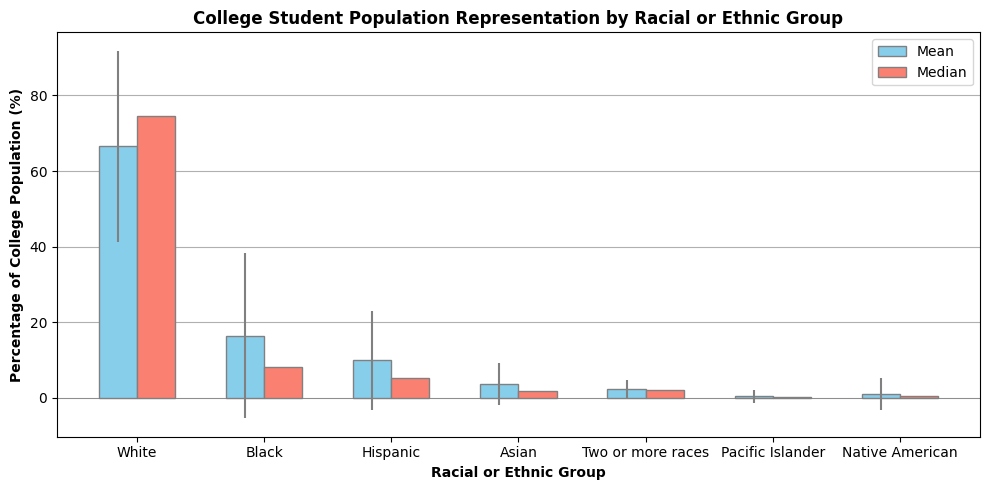

In [12]:
groups = ['White', 'Black', 'Hispanic', 'Asian', 'Two or more races', 'Pacific Islander', 'Native American']

bar_width = 0.3

r1 = range(len(groups))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]

plt.figure(figsize=(10, 5))
plt.bar(r1, avgs, color='skyblue', width=bar_width, edgecolor='grey', label='Mean')

for i in r1:
  plt.errorbar(x = i, y = avgs[i], yerr = stds[i], color = "grey")

plt.bar(r2, meds, color='salmon', width=bar_width, edgecolor='grey', label='Median')

plt.axhline(y = 0, color = "grey", linewidth = 0.5)

plt.xlabel('Racial or Ethnic Group', fontweight='bold')
plt.xticks([r + (0.5 * bar_width) for r in range(len(groups))], groups)

plt.ylabel('Percentage of College Population (%)', fontweight='bold')
plt.title('College Student Population Representation by Racial or Ethnic Group', fontweight='bold')
plt.legend()

plt.tight_layout()
ax = plt.subplot()
ax.set_axisbelow(True)
ax.grid(axis = "y")
plt.show()


In the figure above, we show each race group's average and median percentages of the college population across all colleges. In other words, we show the average/median racial makeup of a college.

The analysis reveals the average representation of various racial or ethnic groups within the college student population. Among the groups examined, white students have the highest average representation, with a mean value of approximately 66.5%. This is followed by Black students, who have an average representation of around 16.4%. Hispanic students account for approximately 9.9% of the college student population on average, while Asian students make up around 3.6%. Additionally, students identifying with two or more races, Pacific Islanders, and Native Americans have lower average representation, with mean values ranging from 0.3% to 2.4%. It is important to understand the demographic of colleges because prior to modeling to predict the selectivity of schools because it allows us to identify disparities in representation, and understand how underrepresentation of certain race groups can lead to inequities in access.

As we can see, the standard deviation score is the highest for the white populations, and seems to steadily decrease as the mean decreases except for Native Americans, who have a score of approximately 4.2, which is quite high compared to the average and the other standard deviation scores. This could be because Native American populations may have more variability in their representation across different states compared to other racial or ethnic groups. Factors such as historical context, geographical distribution, and socioeconomic disparities may contribute to this variability. Additionally, the smaller population size of Native Americans compared to other groups could lead to higher variability in representation percentages among states.

The medians across each race group are also intersting - the white group have the highest with a value of 74.7, and it decreases with the race groups just as the mean does. However, the median being significantly larger than the mean for the white race group and lower than the mean for the other race groups  could signify a potential skewness or asymmetry in the distribution of representation percentages within each racial or ethnic group. A higher median compared to the mean for the white population suggests that there may be some states with disproportionately high representation of white students, pulling the median upwards. Conversely, for other racial or ethnic groups, the lower median compared to the mean indicates the presence of states with lower representation percentages, pulling the median downwards.Thus, we will take a closer look at the demographics of each state in a later figure.

An interesting variable in this dataset that we will not be inputting into our model, but is valuable nonetheless, is the `dif_*race-group*` variable for each race group. It represents the difference between the college's race percentage from the market percentage for that age group. It provides valuable insight into the demographic composition of college populations relative to the broader market or population demographics for each age group. Positive values indicate overrepresentation of a particular racial or ethnic group compared to the market percentage, while negative values suggest underrepresentation.

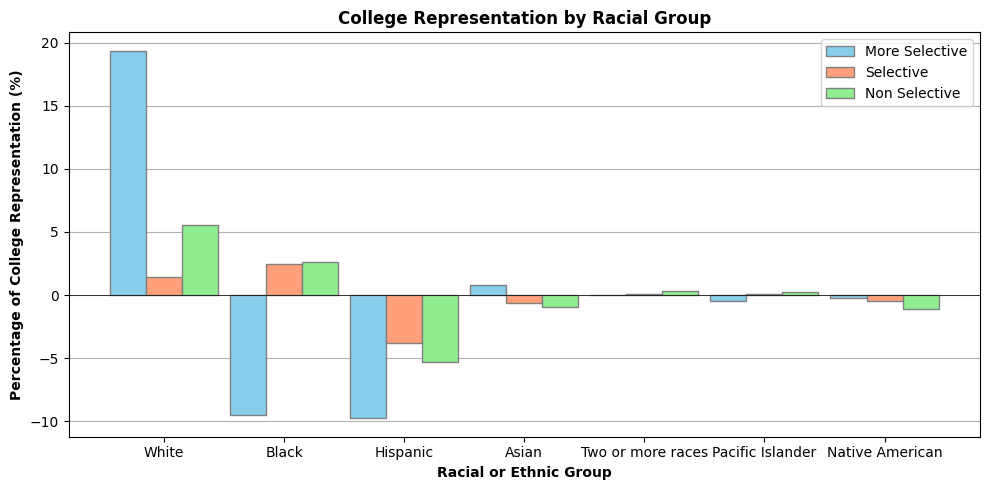

In [13]:
groups = ['White', 'Black', 'Hispanic', 'Asian', 'Two or more races', 'Pacific Islander', 'Native American']

df_race = df.groupby("selectivity").mean("dif_white")
df_race_dif = df_race[["dif_white", "dif_black", "dif_hispa", "dif_asian", "dif_pacis", "dif_amind", "dif_twora"]]

bar_width = 0.3

r1 = range(len(groups))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]

plt.figure(figsize=(10, 5))
ax = plt.subplot()

plt.bar(r1, df_race_dif.loc["more_selective"], color='skyblue', width = bar_width, edgecolor = 'grey', label = 'More Selective')
plt.bar(r2, df_race_dif.loc["selective"], color='lightsalmon', width=bar_width, edgecolor='grey', label='Selective')
plt.bar(r3, df_race_dif.loc["non_selective"], color='lightgreen', width=bar_width, edgecolor='grey', label='Non Selective')
plt.axhline(y = 0, color = "black", linewidth = 0.5)

plt.xlabel('Racial or Ethnic Group', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(groups))], groups)

plt.ylabel('Percentage of College Representation (%)', fontweight='bold')
plt.title('College Representation by Racial Group', fontweight='bold')
plt.legend()

plt.tight_layout()
ax.set_axisbelow(True)
ax.grid(axis = "y")
plt.show()

In the above figure, we show the percentage of college representation by racial/ethnic group which is grouped by the different selectivity levels.

Having a bar close to 0 means that the college representation of a racial group is essentially equivalent to the market representation of that group (there is no significant underrepresentation/overrepresentation).

This graph shows that White students are overrepresented in more selective colleges, while Black and Hispanic students are underrepresented. The market for more selective colleges is the makeup of the entire United States. The average differences in race-group representation between colleges and the broader population reveal nuanced patterns in higher education demographics. Overall, while White students tend to be overrepresented, as indicated by a positive average difference across all selectivities, Hispanic students face significant underrepresentation across all selectivities. Black students are underrepresented in more selective colleges, while somewhat overrepresented at selective and non selective colleges. Asians are slightly overrepresented in more selective colleges, while slightly underrepresented in selective and non selective colleges. Pacific Islander and Multiracial students are not too overrepresented nor too underrepresented across all selectivities. Native American students are slightly underrepresented across all selectivities. These disparities underscore the importance of addressing barriers to access and promoting diversity and inclusion efforts in higher education.

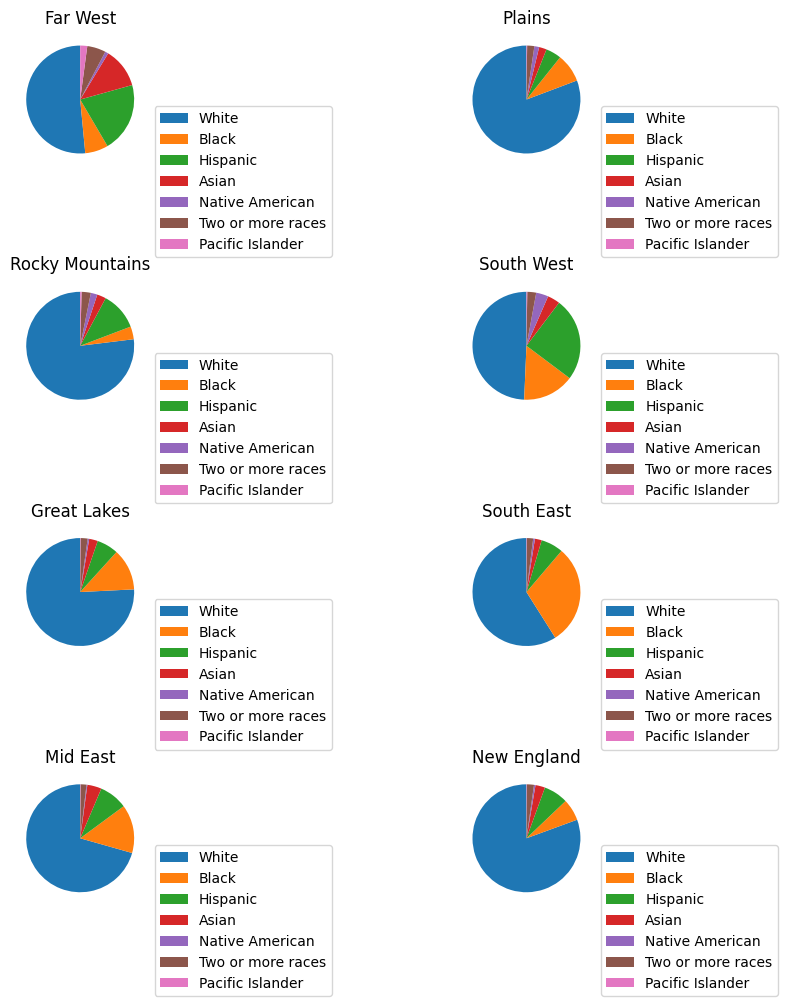

In [20]:
region_data = df.groupby(['new_england', 'mid_east', 'south_east', 'great_lakes', 'south_west', 'rocky_mountains', 'plains', 'far_west']).agg({
    'col_white': 'mean',
    'col_black': 'mean',
    'col_hispa': 'mean',
    'col_asian': 'mean',
    'col_amind': 'mean',
    'col_pacis': 'mean',
    'col_twora': 'mean'
}).reset_index()

race_groups = ['col_white', 'col_black', 'col_hispa', 'col_asian', 'col_amind', 'col_twora', 'col_pacis']
race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Two or more races', 'Pacific Islander']

region_titles = ['Far West', 'Plains', 'Rocky Mountains', 'South West', 'Great Lakes', 'South East', 'Mid East', 'New England']


fig, axs = plt.subplots(4, 2, figsize=(10, 10))
axs = axs.flatten()

for i, region in enumerate(region_data.columns[:-7]):
    race_group_percentages = region_data.loc[:, [region] + race_groups].iloc[i]

    pie = axs[i].pie(race_group_percentages[1:], labels=None, startangle=90)
    axs[i].set_title(region_titles[i])

    axs[i].legend(pie[0], race_labels, loc="best", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In the figure above, we show average racial makeup for a college located in each of the 8 regions.

White student percentages:
- Largest: Plains (80.74%)
- Smallest: South West (49.32%)

Black student percentages:
- Largest: South East (29.81%)
- Smallest: Rocky Mountains (3.82%)

Hispanic student percentages:
- Largest: South West (24.93%)
- Smallest: Plains (4.66%)

Asian student percentages:
- Largest: Far West (11.99%)
- Smallest: South East (2.02%)

Indigenous student percentages:
- Largest: South West (3.66%)
- Smallest: Mid East (0.25%)

Pacific Islander student percentages:
- Largest: Far West (2.10%)
- Smallest: Great Lakes (0.12%)

Multiracial student percentages:
- Largest: Far West (5.59%)
- Smallest: Mid East (1.74%)

Across all regions, White students make up a majority of the college population. The only region where at least 50% of the average college population are students of color is the South West, which consists of the states Texas, Arizona, New Mexico, and Oklahoma. The South West region has the largest percentatges of Hispanic and Indigenous students compared to the other regions, which might be because it is located near Central/Latin America and a number of reservations. The percentage of Black students is largest in the South East, which might be because a large amount of historically black colleges and universities (HBCUs) and located in this area.

# Modeling

We have chosen our models to be multiclass logistic regression models because we have multiple outcome variables. We will have a multiclass logistic regression model for No-Race, POC-Lumped, and POC-Granular. Each model will have a different subset of input variables. Our outcome variables, or classes, are `more_selective`, `non_selective`, and `selective`. Overall, we are running 3 models and evaluating their accuracy, scores, and the coefficients of the different input variables.


## Model Group 1: No Race

Our first model does not consider the racial demographics of the colleges.

Namely, the **input variables** will be:

`public`, `new_england`, `south_east`, `south_west`, `plains`, `far_west`, `rocky_mountains`, `great_lakes`, `mid_east`

The **classes** of our multiclass logistic regression are:

`more_selective`,	`non_selective`,	`selective`

Note: the input variables does not include the column `private` because that would introduce collinearity with `public`. This holds true for all of the models.


In [ ]:
# Training/Testing No-Race Model
train, test = train_test_split(df, test_size = 0.2, random_state = 0)
x_cols1 = ['public', "new_england", "south_east", "south_west", "plains", "far_west", "rocky_mountains", "great_lakes", "mid_east"]

X_train = train[x_cols1]
X_test = test[x_cols1]

selectivity = ['more_selective', 'selective', 'non_selective']

y_train = train["selectivity"]
y_test = test["selectivity"]

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight = "balanced").fit(X_train, y_train)

features = model.feature_names_in_
coefs = model.coef_
intercept = model.intercept_
classes = model.classes_

y_predicted = model.predict(X_test)

for y in range(len(classes)):
  print(classes[y] + " equation")
  cs = coefs[y]
  inter = "{:.4f}".format(intercept[y])
  print(f"Intercept: {intercept[y]:.4f}")
  for x in range(len(features)):
    print(f"{features[x]}: {cs[x]:.4f}")
  print()

more_selective equation
Intercept: -0.0001
public: 0.1345
new_england: 0.2014
south_east: -0.0596
south_west: -0.2802
plains: -0.0165
far_west: -0.0014
rocky_mountains: 0.0295
great_lakes: 0.0031
mid_east: 0.1238

non_selective equation
Intercept: 0.2346
public: -0.6268
new_england: -0.4115
south_east: -0.1746
south_west: 0.4335
plains: 0.0291
far_west: 0.4330
rocky_mountains: 0.1066
great_lakes: -0.3155
mid_east: -0.0999

selective equation
Intercept: -0.2346
public: 0.4923
new_england: 0.2101
south_east: 0.2342
south_west: -0.1533
plains: -0.0126
far_west: -0.4316
rocky_mountains: -0.1362
great_lakes: 0.3124
mid_east: -0.0239



In [ ]:
# Metric Functions
# More Selective
def ms_tfpn(cm):
  tp = cm[0, 0]
  fp = cm[0, 1] + cm[0, 2]
  fn = cm[1, 0] + cm[2, 0]
  tn = cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2]
  return tp, fp, fn, tn

# Selective
def s_tfpn(cm):
  tp = cm[2, 2]
  fp = cm[2, 0] + cm[2, 1]
  fn = cm[0, 2] + cm[1, 2]
  tn = cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1]
  return tp, fp, fn, tn

#  Non selective
def non_tfpn(cm):
  tp = cm[1, 1]
  fp = cm[1, 0] + cm[1, 2]
  fn = cm[0, 1] + cm[2, 1]
  tn = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2]
  return tp, fp, fn, tn

# Precision
def prec_calc(tp, fp):
  if tp == 0:
    return 0
  return tp / (tp + fp)

# TPR
def calc_tpr(tp, fn):
  if tp == 0:
    return 0
  return tp / (tp + fn)

# FPR
def calc_fpr(tn, fp):
  return fp / (tn + fp)

# Accuracy
def calc_accur(tp, fp, fn, tn):
  return (tp + tn) / (tp + fp + fn + tn)

# ROC AUC (OvR) score
def auc_ovr(y_test, y_proba):
  m_test = [1 if s == "more_selective" else 0 for s in y_test]
  n_test = [1 if s == "non_selective" else 0 for s in y_test]
  s_test = [1 if s == "selective" else 0 for s in y_test]

  all_tests = [m_test, n_test, s_test]

  m_pred = [1 if s == "more_selective" else 0 for s in y_predicted]
  n_pred = [1 if s == "non_selective" else 0 for s in y_predicted]
  s_pred = [1 if s == "selective" else 0 for s in y_predicted]

  all_predictions = [m_pred, n_pred, s_pred]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(len(classes)):
    c = classes[i]
    title = "Selective"
    if i == 0:
      title = "More Selective"
    elif i == 1:
      title = "Non Selective"
    fpr[c], tpr[c], _ = metrics.roc_curve(all_tests[i], all_predictions[i])
    roc_auc[c] = metrics.roc_auc_score(all_tests[i], y_proba[:, i])
    print("ROC AUC (One vs Rest) for " + str(title) + f": {roc_auc[c]:.4f}")
    plt.figure(figsize = (5, 5))
    plt.plot(fpr[c], tpr[c], label = f'ROC AUC: {roc_auc[c]:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title("ROC AUC Curve for " + title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc = "lower right")

In [ ]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_predicted)

# TP, TN, FP, FN for More Selective
tp_more, fp_more, fn_more, tn_more = ms_tfpn(cm)

# TP, TN, FP, FN for Selective
tp_sel, fp_sel, fn_sel, tn_sel = s_tfpn(cm)

# TP, TN, FP, FN for Non Selective
tp_non, fp_non, fn_non, tn_non = non_tfpn(cm)

# Precision
print(f"Precision for more selective: {prec_calc(tp_more, fp_more):.4f}")
print(f"Precision for non selective: {prec_calc(tp_non, fp_non):.4f}")
print(f"Precision for selective: {prec_calc(tp_sel, fp_sel):.4f}")
print()

# TPR
print(f"True Positive Rate for more selective: {calc_tpr(tp_more, fn_more):.4f}")
print(f"True Positive Rate for non selective: {calc_tpr(tp_non, fn_non):.4f}")
print(f"True Positive Rate for selective: {calc_tpr(tp_sel, fn_sel):.4f}")
print()

# FPR
print(f"False Positive Rate for more selective: {calc_fpr(tn_more, fp_more):.4f}")
print(f"False Positive Rate for non selective: {calc_fpr(tn_non, fp_non):.4f}")
print(f"False Positive Rate for selective: {calc_fpr(tn_sel, fp_sel):.4f}")
print()

# Accuracy
print(f"Accuracy for more selective: {calc_accur(tp_more, fp_more, fn_more, tn_more):.4f}")
print(f"Accuracy for non selective: {calc_accur(tp_non, fp_non, fn_non, tn_non):.4f}")
print(f"Accuracy for selective: {calc_accur(tp_sel, fp_sel, fn_sel, tn_sel):.4f}")
print()


Precision for more selective: 0.1818
Precision for non selective: 0.6220
Precision for selective: 0.3623

True Positive Rate for more selective: 0.2273
True Positive Rate for non selective: 0.4540
True Positive Rate for selective: 0.4902

False Positive Rate for more selective: 0.1630
False Positive Rate for non selective: 0.3288
False Positive Rate for selective: 0.4037

Accuracy for more selective: 0.7531
Accuracy for non selective: 0.5531
Accuracy for selective: 0.5625



ROC AUC (One vs Rest) for More Selective: 0.5273
ROC AUC (One vs Rest) for Non Selective: 0.5937
ROC AUC (One vs Rest) for Selective: 0.5877


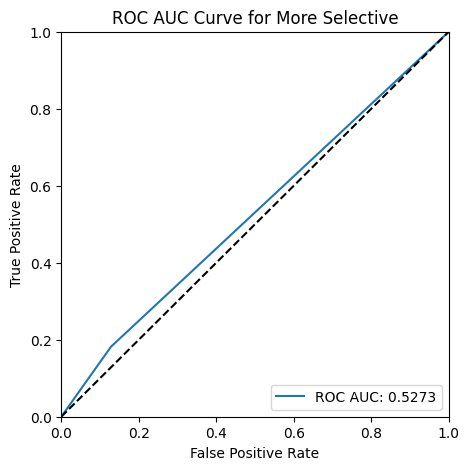

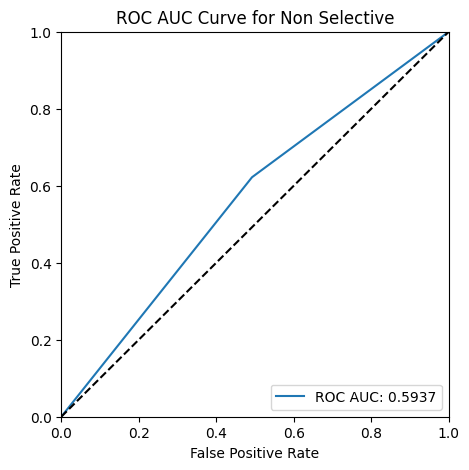

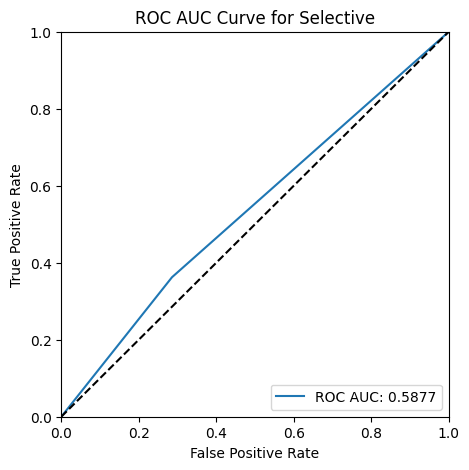

In [ ]:
# ROC AUC (OvR) score
y_proba = model.predict_proba(X_test)

auc_ovr(y_test, y_proba)

No-Race Model Summarization

| Class | Accuracy | ROC AUC OvR | Precision | TPR | FPR |
| :- | :- | :- | :- | :- | :- |
| More Selective | 0.7531 | 0.5273 | 0.1818 | 0.2273 | 0.1630|
| Selective      | 0.5625 | 0.5877 | 0.3623 | 0.4902 | 0.4037 |
| Non Selective  | 0.5531 | 0.5937 | 0.6220 | 0.4540 | 0.3288 |



## Model Group 2: POC Lumped

For the second model, we are using the same input variables as Model 1 AND the column that gives the percentage of the school population that are Person of Color.

Namely, the **input variables** will be:

`public`, `new_england`, `south_east`, `south_west`, `plains`, `far_west`, `rocky_mountains`, `great_lakes`, `mid_east`, `col_poc`

The **classes** of our multiclass logistic regression are:

`more_selective`,	`non_selective`, `selective`,

In [ ]:
# Training/Testing POC-Lumped Model
train, test = train_test_split(df, test_size = 0.2, random_state = 0)
x_cols1 = ['public', "new_england", "south_east", "south_west", "plains", "far_west", "rocky_mountains", "great_lakes", "mid_east", "col_poc"]

X_train = train[x_cols1]
X_test = test[x_cols1]

selectivity = ['more_selective', 'selective', 'non_selective']

y_train = train["selectivity"]
y_test = test["selectivity"]

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight = "balanced", max_iter = 200).fit(X_train, y_train)

features = model.feature_names_in_
coefs = model.coef_
intercept = model.intercept_
classes = model.classes_

y_predicted = model.predict(X_test)

for y in range(len(classes)):
  print(classes[y] + " equation")
  cs = coefs[y]
  inter = "{:.4f}".format(intercept[y])
  print(f"Intercept: {intercept[y]:.4f}")
  for x in range(len(features)):
    print(f"{features[x]}: {cs[x]:.4f}")
  print()

more_selective equation
Intercept: 0.6622
public: 0.1806
new_england: 0.0015
south_east: 0.0854
south_west: 0.2141
plains: -0.2197
far_west: 0.4706
rocky_mountains: -0.0536
great_lakes: -0.0901
mid_east: 0.0950
col_poc: -0.0266

non_selective equation
Intercept: -0.1657
public: -0.6621
new_england: -0.2864
south_east: -0.2543
south_west: 0.1797
plains: 0.1682
far_west: 0.1831
rocky_mountains: 0.1845
great_lakes: -0.2476
mid_east: -0.0495
col_poc: 0.0150

selective equation
Intercept: -0.4965
public: 0.4815
new_england: 0.2849
south_east: 0.1689
south_west: -0.3937
plains: 0.0515
far_west: -0.6538
rocky_mountains: -0.1309
great_lakes: 0.3377
mid_east: -0.0455
col_poc: 0.0117



In [ ]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_predicted)

# TP, TN, FP, FN for More Selective
tp_more, fp_more, fn_more, tn_more = ms_tfpn(cm)

# TP, TN, FP, FN for Selective
tp_sel, fp_sel, fn_sel, tn_sel = s_tfpn(cm)

# TP, TN, FP, FN for Non Selective
tp_non, fp_non, fn_non, tn_non = non_tfpn(cm)

# Precision
print(f"Precision for more selective: {prec_calc(tp_more, fp_more):.4f}")
print(f"Precision for non selective: {prec_calc(tp_non, fp_non):.4f}")
print(f"Precision for selective: {prec_calc(tp_sel, fp_sel):.4f}")
print()

# TPR
print(f"True Positive Rate for more selective: {calc_tpr(tp_more, fn_more):.4f}")
print(f"True Positive Rate for non selective: {calc_tpr(tp_non, fn_non):.4f}")
print(f"True Positive Rate for selective: {calc_tpr(tp_sel, fn_sel):.4f}")
print()

# FPR
print(f"False Positive Rate for more selective: {calc_fpr(tn_more, fp_more):.4f}")
print(f"False Positive Rate for non selective: {calc_fpr(tn_non, fp_non):.4f}")
print(f"False Positive Rate for selective: {calc_fpr(tn_sel, fp_sel):.4f}")
print()

# Accuracy
print(f"Accuracy for more selective: {calc_accur(tp_more, fp_more, fn_more, tn_more):.4f}")
print(f"Accuracy for non selective: {calc_accur(tp_non, fp_non, fn_non, tn_non):.4f}")
print(f"Accuracy for selective: {calc_accur(tp_sel, fp_sel, fn_sel, tn_sel):.4f}")
print()


Precision for more selective: 0.5818
Precision for non selective: 0.4409
Precision for selective: 0.2754

True Positive Rate for more selective: 0.2424
True Positive Rate for non selective: 0.4912
True Positive Rate for selective: 0.5135

False Positive Rate for more selective: 0.1223
False Positive Rate for non selective: 0.3447
False Positive Rate for selective: 0.4065

Accuracy for more selective: 0.6156
Accuracy for non selective: 0.5969
Accuracy for selective: 0.5750



ROC AUC (One vs Rest) for More Selective: 0.6323
ROC AUC (One vs Rest) for Non Selective: 0.6286
ROC AUC (One vs Rest) for Selective: 0.5597


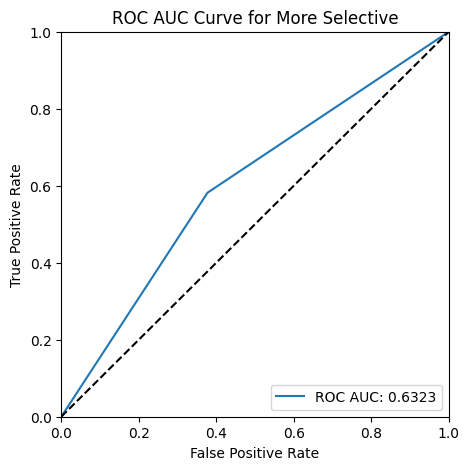

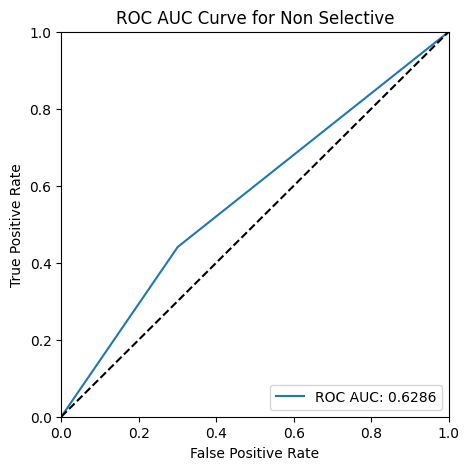

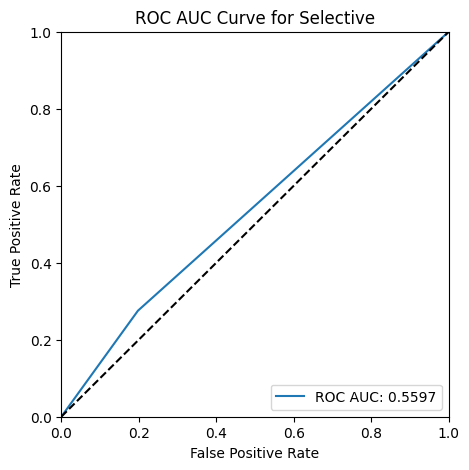

In [ ]:
# ROC AUC (OvR) score
y_proba = model.predict_proba(X_test)

auc_ovr(y_test, y_proba)

POC-Lumped Model Summarization

| Class | Accuracy | ROC AUC OvR | Precision | TPR | FPR |
| :- | :- | :- | :- | :- | :- |
| More Selective | 0.6156 | 0.6323 | 0.5818 | 0.2424 | 0.1223 |
| Selective      | 0.5750 | 0.5597 | 0.2754 | 0.5135 | 0.4065 |
| Non Selective  | 0.5969 | 0.6286 | 0.4409 | 0.4912 | 0.3447 |


## Model Group 3: POC granular

In this model, we are including all of the input variables from Model 2, but instead of using `col_poc`, which is the percentage of students at that college who are Persons of Color, it is broken down into the specific race groups.

Namely, the **input variables** will be:

`public`, `new_england`, `south_east`, `south_west`, `plains`, `far_west`, `rocky_mountains`, `great_lakes`, `mid_east`, `col_black`,	`col_hispa`,	`col_asian`,	`col_amind`,	`col_pacis`, and	`col_twora`

The **classes** of our multiclass logistic regression are:

`more_selective`,	`non_selective`, `selective`

In [ ]:
# Training/Testing POC-Granular Model
train, test = train_test_split(df, test_size = 0.2, random_state = 0)
x_cols1 = ['public', "new_england", "south_east", "south_west", "plains", "far_west", "rocky_mountains", "great_lakes", "mid_east",
           'col_black', 'col_hispa', 'col_asian', 'col_amind', 'col_pacis',	'col_twora']

X_train = train[x_cols1]
X_test = test[x_cols1]

selectivity = ['more_selective', 'selective', 'non_selective']

y_train = train["selectivity"]
y_test = test["selectivity"]

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight = "balanced", max_iter = 600).fit(X_train, y_train)

features = model.feature_names_in_
coefs = model.coef_
intercept = model.intercept_
classes = model.classes_

y_predicted = model.predict(X_test)

for y in range(len(classes)):
  print(classes[y] + " equation")
  cs = coefs[y]
  inter = "{:.4f}".format(intercept[y])
  print(f"Intercept: {intercept[y]:.4f}")
  for x in range(len(features)):
    print(f"{features[x]}: {cs[x]:.4f}")
  print()

more_selective equation
Intercept: 0.3968
public: -0.0535
new_england: -0.0332
south_east: 0.7596
south_west: 0.3665
plains: 0.0303
far_west: -1.1186
rocky_mountains: -0.0864
great_lakes: 0.0344
mid_east: 0.0725
col_black: -0.1300
col_hispa: -0.0217
col_asian: 0.1001
col_amind: -0.2761
col_pacis: -1.9097
col_twora: 0.3138

non_selective equation
Intercept: 0.0300
public: -0.5159
new_england: -0.2519
south_east: -0.5477
south_west: 0.0062
plains: 0.0543
far_west: 0.9162
rocky_mountains: 0.1456
great_lakes: -0.2785
mid_east: -0.0415
col_black: 0.0641
col_hispa: 0.0179
col_asian: -0.0377
col_amind: 0.1482
col_pacis: 1.1110
col_twora: -0.2309

selective equation
Intercept: -0.4268
public: 0.5693
new_england: 0.2852
south_east: -0.2119
south_west: -0.3727
plains: -0.0846
far_west: 0.2024
rocky_mountains: -0.0592
great_lakes: 0.2441
mid_east: -0.0309
col_black: 0.0659
col_hispa: 0.0038
col_asian: -0.0624
col_amind: 0.1279
col_pacis: 0.7987
col_twora: -0.0829



In [ ]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_predicted)

# TP, TN, FP, FN for More Selective
tp_more, fp_more, fn_more, tn_more = ms_tfpn(cm)

# TP, TN, FP, FN for Selective
tp_sel, fp_sel, fn_sel, tn_sel = s_tfpn(cm)

# TP, TN, FP, FN for Non Selective
tp_non, fp_non, fn_non, tn_non = non_tfpn(cm)

# Precision
print(f"Precision for more selective: {prec_calc(tp_more, fp_more):.4f}")
print(f"Precision for non selective: {prec_calc(tp_non, fp_non):.4f}")
print(f"Precision for selective: {prec_calc(tp_sel, fp_sel):.4f}")
print()

# TPR
print(f"True Positive Rate for more selective: {calc_tpr(tp_more, fn_more):.4f}")
print(f"True Positive Rate for non selective: {calc_tpr(tp_non, fn_non):.4f}")
print(f"True Positive Rate for selective: {calc_tpr(tp_sel, fn_sel):.4f}")
print()

# FPR
print(f"False Positive Rate for more selective: {calc_fpr(tn_more, fp_more):.4f}")
print(f"False Positive Rate for non selective: {calc_fpr(tn_non, fp_non):.4f}")
print(f"False Positive Rate for selective: {calc_fpr(tn_sel, fp_sel):.4f}")
print()

# Accuracy
print(f"Accuracy for more selective: {calc_accur(tp_more, fp_more, fn_more, tn_more):.4f}")
print(f"Accuracy for non selective: {calc_accur(tp_non, fp_non, fn_non, tn_non):.4f}")
print(f"Accuracy for selective: {calc_accur(tp_sel, fp_sel, fn_sel, tn_sel):.4f}")
print()


Precision for more selective: 0.6727
Precision for non selective: 0.4488
Precision for selective: 0.4130

True Positive Rate for more selective: 0.3592
True Positive Rate for non selective: 0.5182
True Positive Rate for selective: 0.5327

False Positive Rate for more selective: 0.0829
False Positive Rate for non selective: 0.3333
False Positive Rate for selective: 0.3803

Accuracy for more selective: 0.7375
Accuracy for non selective: 0.6156
Accuracy for selective: 0.5906



ROC AUC (One vs Rest) for More Selective: 0.8053
ROC AUC (One vs Rest) for Non Selective: 0.6974
ROC AUC (One vs Rest) for Selective: 0.6133


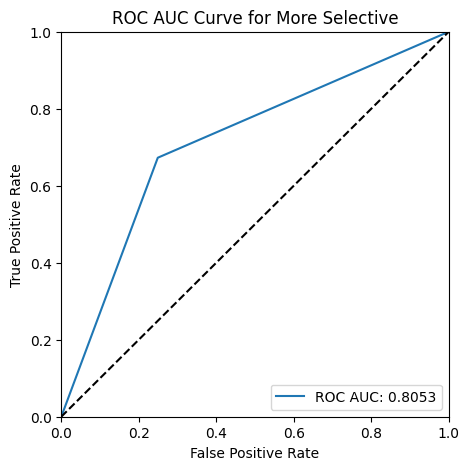

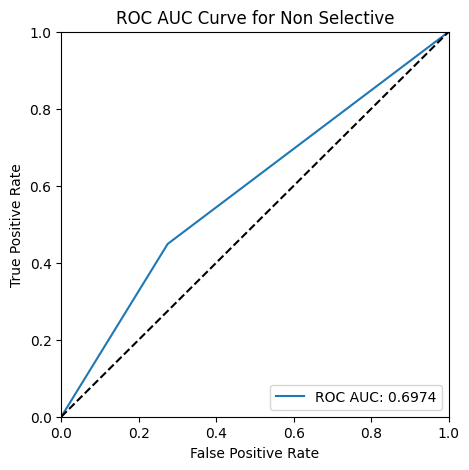

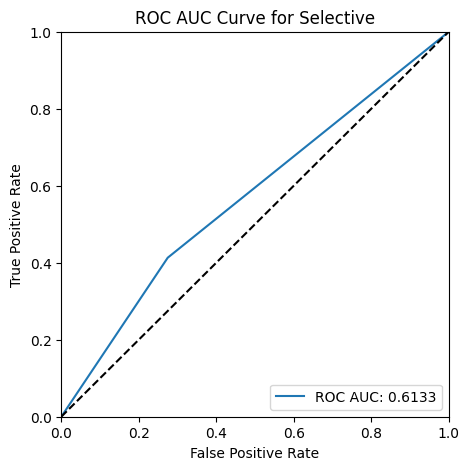

In [ ]:
# ROC AUC (OvR) score
y_proba = model.predict_proba(X_test)

auc_ovr(y_test, y_proba)

POC-Granular Model Summarization

| Class | Accuracy | ROC AUC OvR | Precision | TPR | FPR |
| :- | :- | :- | :- | :- | :- |
| More Selective | 0.7375 | 0.8053 | 0.6727 | 0.3592 | 0.0829 |
| Selective      | 0.5906 | 0.6133 | 0.4130 | 0.5327 | 0.3803 |
| Non Selective  | 0.6156 | 0.6974 | 0.4488 | 0.5182 | 0.3333 |

# Results

#### **Model Estimates**

Our multiclass logistic regression models can help determine the probability of some college being more selective, non selective, or just selective based on the inputs of the model.

For the following examples, we will be using a private college in New England with no people of color as a baseline to assess the differing probabilities of each selectivity in the 3 models. Additionally, for the models that involve race, we will use a private college in New England with 60% people of color (10% for each race group) to see any changes with races. The following probabilities were determined using these formulas:

ln(P/1-P) = intercept + c_1 * x_1 + ... + c_n * x_n

where c_1, ..., c_n are coefficients associated with the x_1, ..., x_n input variables.

P = $\frac{e^{intercept + c_1 * x_1 + ... + c_n * x_n}}{1 + e^{intercept + c_1 * x_1 + ... + c_n * x_n}}$

**No-Race**

For a private college in New England, the No-Race model expects that there is a 0.5502 probability that the college is considered more selective, while there is a 0.4559 probability of it being selective and a 0.4939 probability of it being non selective.

**No-Race Positive/Negative Coefficients for the Class Equations:**

| Class | Public | New England | Mid East | South East | South West | Great Lakes | Plains | Rocky Mountains | Far West |
| :- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| More Selective | + | + | + | - | - | + | - | + | + |
| Selective      | - | - | - | - | + | - | + | + | + |
| Non Selective  | + | + | - | + | - | + | - | - | - |

More selective has a positive coefficient with public which is somewhat weird since many more selective colleges are private, such as the colleges in the Ivy League.

**POC-Lumped**

For a private college in New England with no people of color, the POC-Lumped model expects that there is a 0.6601 probability that the college is considered more selective, while there is a 0.3889 probability of it being selective and a 0.4473 probability of it being non selective.

For a private college in New England with 60% people of color, the POC-Lumped model expects that there is a 0.2826 probability that the college is considered more selective, while there is a 0.6101 probability of it being selective and a 0.6202 probability of it being non selective. Holding all else constant, increasing the percentage of people of color decreases the probability of the college being more selective, and increases the probability of the college being either selective or non selective.

**POC-Lumped Positive/Negative Coefficients for the Class Equations:**

| Class | Public | New England | Mid East | South East | South West | Great Lakes | Plains | Rocky Mountains | Far West | POC |
| :- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| More Selective | + | + | + | + | + | - | - | - | + | - |
| Selective      | - | - | - | - | + | - | + | + | + | + |
| Non Selective  | + | + | - | + | - | + | + | - | - | + |

There is a negative coefficient for POC associated with more selective colleges, while there is a positive coefficient for selective and non selective. This implies that as the percentage of people of color increase, the less likely the college is more selective and the more likely the college is either selective or non selective.

**POC-Granular**

For a private college in New England with no people of color, the POC-Lumped model expects that there is a 0.5899 probability that the college is considered more selective, while there is a 0.4448 probability of it being selective and a 0.4647 probability of it being non selective.

For a private college in New England with 60% people of color (evenly split among the 6 racial groups), the POC-Lumped model expects that there is a $6.365 x 10^{-7}$ probability that the college is considered more selective, while there is a 0.9999 probability of it being selective and a 0.9998 probability of it being non selective.

**POC-Granular Positive/Negative Coefficients for the Class Equations:**

| Class | Public | New England | Mid East | South East | South West | Great Lakes | Plains | Rocky Mountains | Far West | Black | Hispanic | Asian | Indigenous | Pacific | Multiracial |
| :- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| More Selective | - | - | + | + | + | + | + | - | - | - | - | + | - | - | + |
| Selective      | - | - | - | - | + | - | + | + | + | + | + | - | + | + | - |
| Non Selective  | + | + | - | - | - | + | - | - | + | + | + | - | + | + | - |

For the race variables, there seems to be oppositely signed coefficients with more selective and selective & non selective colleges. When predicting with the POC Granular model, there are negative coefficients associated with Black, Hispanic, Indigenous, and Pacific percentage groups while there are positive coefficients associated with Asian and Multiracial when predicting more selective. The signs of these coefficients are flipped when predicting selective and non selective.

#### **Model Performance**

For all the models, we used the ROC AUC One-vs-Rest scheme to compare each of our selectivity classes to the rest of the classes, which is typical to do in multiclass logistic regressions. The No-Race model does not have very good AUC scores for all 3 classes; the score for more selective, selective, and non selective is 0.5273, 0.5877, and 0.5937. Especially when predicting for more selective, the model is close to just randomly selecting the class. The POC-Lumped Model has an AUC of 0.6323 for more selective, 0.5597 for selective, and 0.6286 for non selective, indicating it is not that good of a model. The POC-Granular model has an AUC of 0.8053 for more selective, 0.6133 for selective, and 0.6974 for non selective, indicating that it is an okay model for selective and non selective, and a good model for more selective.

The only model-class combinations that get at least a 70% in accuracy are No Race for more selective and POC Granular for more selective. All other combinations have an accuracy in the 50s and 60s, indicating that they are not that good. The precision scores across all model-class combinations are not very good, ranging from the 10s to the 60s. A good true positive rate (TPR) should be high. The TPR from all model-class combinations are not that good, ranging from the 20s to the 50s. A good false positive rate (FPR) should be low. All models that predict more selective have quite low FPRs (hovering around 10%), while all the other model-class combinations have FPRs in the 30s and 40s.

**Model Performance for Predicting More Selective**

| Model | Accuracy | ROC AUC OvR | Precision | TPR | FPR |
| :- | :- | :- | :- | :- | :- |
| No-Race      | 0.7531 | 0.5273 | 0.1818 | 0.2273 | 0.1630 |
| POC-Lumped   | 0.6156 | 0.6323 | 0.5818 | 0.2424 | 0.1223 |
| POC-Granular | 0.7375 | 0.8053 | 0.6727 | 0.3527 | 0.0829 |

The No-Race model has the highest accuracy with POC-Granular in a close second. The POC-Granular model has the highest ROC AUC. Thus, the POC-Granular model is best when predicting more selective.

**Model Performance for Predicting Selective**

| Model | Accuracy | ROC AUC OvR | Precision | TPR | FPR |
| :- | :- | :- | :- | :- | :- |
| No-Race      | 0.5625 | 0.5877 | 0.3623 | 0.4902 | 0.4037 |
| POC-Lumped   | 0.5750 | 0.5597 | 0.2754 | 0.5135 | 0.4065 |
| POC-Granular | 0.5906 | 0.6133 | 0.4130 | 0.5327 | 0.3803 |

The POC-Granular model has the highest accuracy and the highest ROC AUC, so it is the best model for predicting selective.

**Model Performance for Predicting Non Selective**

| Model | Accuracy | ROC AUC OvR | Precision | TPR | FPR |
| :- | :- | :- | :- | :- | :- |
| No-Race      | 0.5531 | 0.5937 | 0.6220 | 0.4540 | 0.3288 |
| POC-Lumped   | 0.5969 | 0.6286 | 0.4409 | 0.4912 | 0.3447 |
| POC-Granular | 0.6156 | 0.6974 | 0.4488 | 0.5182 | 0.3333 |

The POC-Granular model has the highest accuracy and the highest ROC AUC, so it is the best model for predicting non selective.

#### **Overall**

Our results support our hypothesis; across all prediction classes, the POC-Granular model works best. Adding racial/ethnic granularity when predicting college selectivity works better than lumping people of color together and not including race at all. It is important to note that our POC-Granular model, even though it has the highest accuracy/ROC AUC compared to the other models, does not perform that well. Our models fail to account for other factors of a student population in colleges, such as sensitive attributes, academics, and extracurriculars, which can be a big part of a colleges makeup and can better predict selectivity. Relying on public/private status, regional location, and race does not result in the best performance metrics nor the best predicting capabilities.


# Conclusions & Limitations

Our hypothesis was that the more granular the races/ethnicities in a model, the better it would be at predicting the college selectivity level. In other words, a race-granular model would perform better than with a model with races lumped together and a model with no races at all. Through our modeling and analysis, we determined that this statement is true; our POC-granular models had the best accuracy and ROC AUC OvR scores when compared to the other models. However, all of our models did not perform extremely well in general.

Data Limitations:
-	College representativeness (the percentage of school population of each race) was computed by the original dataset authors using US Census data. However, we noticed that some of the percentages, when added together, did not equal 100%. Some were either above or below it, which raises some questions.

Model Limitations:
-	Our no race model only contains inputs that are either valued at 1 or 0, so there is a possibility that underfitting may occur since the model is relatively simple.

Analysis Limitations:
-	We were unable to determine if there were any coefficients that had statistical significance. This makes it difficult to draw conclusions from the model.

Alternative Choices:
-	We choose to remove some colleges from our dataset if the sum of the percentages of school populations of each race was significantly different from 100%. This was to make sure we are using the most accurate data. It would be difficult to draw valid conclusions about a college’s selectivity if the racial percentages only added to 50% when it should be to 100%.
-	For the summed percentages that were close to 100%, we scaled the data to ensure they would all equal 100%. We did this because the summed percentages were already close to 100% and it would not be a significant change (like from 50%). This was done to be able to draw valid conclusions from the data.
-	Our original dataset determined the location of the colleges by state. Originally, we were going to use one-hot encoding on the states but we recieved a singular matrix error, likely due to the fact that there were an insignificant amount of colleges in each state. Thus, we decided to use the location data, but by region instead of state. How we split up the regions (which states are part of which regions) is described in the Data Summary section.
- To avoid collinearity issues, we did not include the variable `private` in all of our models (since we already have a `public` input). Additionally, we did not include `col_white` in our models involving race (since we have all other race inputs).




# Contribution Notes

Srinitya worked on the Introduction and Data Collection sections as well as the no data model.

Nuray worked on the data cleaning, data summaries, and the machine learning models.

Alexia worked on the data cleaning, data summary, multiclass logistic regression models, results, and conclusions and limitations.

# Sources Cited
Chetty, Raj et al. 2023. Diversifying Society’s Leaders? The Determinants and Causal Effects of Admission to Highly Selective Private Colleges. Opportunity Insights. https://opportunityinsights.org/paper/collegeadmissions/

Grossman, J. et al. 2023.The disparate impacts of college admissions policies on Asian American applicants, National Bureau of Economic Research. https://www.nber.org/papers/w31527

Hanson, Melanie. 2024. College Enrollment & Student Demographic Statistics. EducationData.org. https://educationdata.org/college-enrollment-statistics

Kelly Van Busum and Shiaofen Fang. 2023. Analysis of AI Models for Student Admissions: A Case Study. In Proceedings of the 38th ACM/SIGAPP Symposium on Applied Computing (SAC '23). Association for Computing Machinery, New York, NY, USA, 17–22. https://doi.org/10.1145/3555776.3577743

Monarrez, T. and Washington, K. (2020) Racial and ethnic representation in postsecondary education, Urban Institute. https://www.urban.org/research/publication/ racial-and-ethnic-representation -postsecondary-education

Washington, T.M. and K. (2020) Racial and ethnic representativeness of US Postsecondary Education Institutions, Urban Data Catalog. https://datacatalog.urban.org/ dataset/racial-and-ethnic- representativeness-us-postsecondary-education-institutions.
